<a href="https://colab.research.google.com/github/Sunny250389/ML_Practice/blob/master/TataMotors_StockPrice_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Train Data
dataset_train = pd.read_csv("TATAMOTORS.BO_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

In [0]:
# Feature Scaling (when sigmoid function is used in NN, it is reccomended to use Normalization)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 637):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping for making it in a format which is required for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Initialising the RNN
regressor = Sequential()

In [10]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
577/577 [==============================] - 6s 10ms/step - loss: 0.0665
Epoch 2/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0106
Epoch 3/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0064
Epoch 4/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0062
Epoch 5/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0061
Epoch 6/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0060
Epoch 7/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0053
Epoch 8/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0053
Epoch 9/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0050
Epoch 10/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0058
Epoch 11/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0046


In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('TATAMOTORS.BO_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 84):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

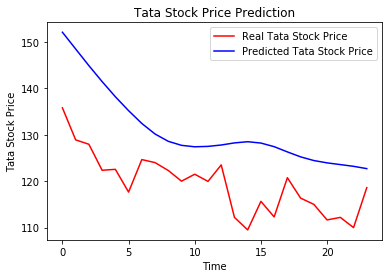

In [25]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tata Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tata Stock Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tata Stock Price')
plt.legend()
plt.show()

In [26]:
predicted_stock_price

array([[152.08226 ],
       [148.48038 ],
       [144.88808 ],
       [141.45134 ],
       [138.19237 ],
       [135.1885  ],
       [132.4326  ],
       [130.16306 ],
       [128.5833  ],
       [127.718124],
       [127.40759 ],
       [127.494194],
       [127.79033 ],
       [128.24396 ],
       [128.49997 ],
       [128.21016 ],
       [127.433266],
       [126.303665],
       [125.23538 ],
       [124.44338 ],
       [123.94343 ],
       [123.57304 ],
       [123.19901 ],
       [122.70068 ]], dtype=float32)

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [28]:
rmse

12.642560377982182